In [1]:
library(forecast)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Aggregated TS

In [2]:
df_eu  <-  read.csv(file="hts_eu_a10.csv", header=TRUE, sep=",", row.names =1 )

In [3]:
gdp_agg <- df_eu_sums <-  rowSums(df_eu)

In [4]:
gdp_agg %>% head()

2000-01-01 2000-04-01 2000-07-01 2000-10-01 2001-01-01 2001-04-01 
   2097016    2149714    2163305    2249545    2197372    2259781

In [5]:
gdp_agg  <- ts(gdp_agg, frequency = 4, start = 2000) 
gdp_agg

        Qtr1    Qtr2    Qtr3    Qtr4
2000 2097016 2149714 2163305 2249545
2001 2197372 2259781 2251095 2331590
2002 2292365 2334466 2334677 2411279
2003 2333137 2351889 2373162 2453219
2004 2419886 2491435 2490484 2564171
2005 2515137 2593341 2594523 2693043
2006 2655689 2724874 2745583 2852082
2007 2834787 2892483 2914308 2996058
2008 2923510 2963777 2946623 2919566
2009 2721873 2766663 2784353 2842605
2010 2784779 2873264 2893451 2968661
2011 2921483 2953958 2945649 3011265
2012 2958070 3010722 3033490 3075700
2013 2977965 3035742 3044227 3122904
2014 3072484 3133907 3160757 3236918
2015 3227776 3311839 3325372 3405251
2016 3304666 3362395 3318470 3395389
2017 3357919 3432684 3434182 3530894
2018 3471013 3542181 3541582        

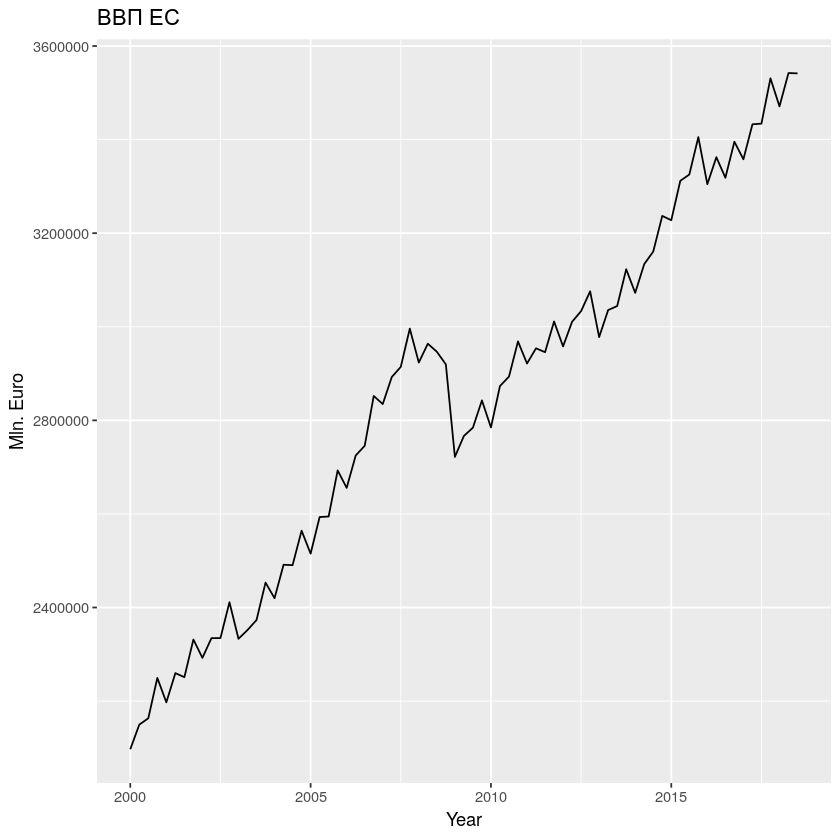

In [6]:
autoplot(gdp_agg) +
    xlab("Year") + ylab("Mln. Euro") +
    ggtitle("ВВП ЕС") 

In [7]:
train <- window(gdp_agg, end=c(2016,4))
test <- window(gdp_agg, start=c(2017,1))

#### Модель 0: RW with drift

The random walk with drift model is

$$Y_t=c + Y_{t-1} + Z_t$$

``rwf(y, h, drift=TRUE)``

#### Модель 1: Theta

``library(foreast)``

Equivalent to simple exponential smoothing with drift 

$\sim$ ETS(AAdN)

In [8]:
ets(train)

ETS(M,Ad,A) 

Call:
 ets(y = train) 

  Smoothing parameters:
    alpha = 0.972 
    beta  = 0.6358 
    gamma = 0.0042 
    phi   = 0.8 

  Initial states:
    l = 2108703.3746 
    b = 29348.6343 
    s = 43366.96 -8526.152 2324.243 -37165.05

  sigma:  0.0101

     AIC     AICc      BIC 
1688.558 1692.417 1710.753 

In [9]:
auto.arima(train)

Series: train 
ARIMA(2,0,0)(2,1,0)[4] with drift 

Coefficients:
         ar1      ar2     sar1     sar2      drift
      1.4235  -0.5655  -0.3083  -0.4719  18140.750
s.e.  0.0987   0.1006   0.1399   0.1145   3356.515

sigma^2 estimated as 779254753:  log likelihood=-745.74
AIC=1503.48   AICc=1504.95   BIC=1516.43

In [10]:
auto.arima(train, ic='bic')

Series: train 
ARIMA(2,0,0)(2,1,0)[4] with drift 

Coefficients:
         ar1      ar2     sar1     sar2      drift
      1.4235  -0.5655  -0.3083  -0.4719  18140.750
s.e.  0.0987   0.1006   0.1399   0.1145   3356.515

sigma^2 estimated as 779254753:  log likelihood=-745.74
AIC=1503.48   AICc=1504.95   BIC=1516.43

In [11]:
Arima(train, order=c(2,1,2), seasonal=c(2,1,2))

Series: train 
ARIMA(2,1,2)(2,1,2)[4] 

Coefficients:
          ar1      ar2     ma1     ma2     sar1     sar2     sma1    sma2
      -0.7498  -0.4656  1.3089  1.0000  -0.0792  -0.2608  -1.0277  0.0278
s.e.   0.1354   0.1253  0.0795  0.0902   0.4602   0.1355   0.5142  0.4875

sigma^2 estimated as 586803189:  log likelihood=-730.07
AIC=1478.14   AICc=1481.53   BIC=1497.42

In [12]:
gdp_rwf <- rwf(train,h=7)
gdp_rwfwd <- rwf(train,h=7, drift=TRUE)
gdp_snaive  <- snaive(train,h=7)
gdp_theta  <- thetaf(train, h=7)
gdp_arima  <- forecast(Arima(train, order=c(2,1,2), seasonal=c(2,1,2)), h=7)
gdp_auto_arima  <- forecast(auto.arima(train), h=7)
gdp_ets <- forecast(ets(train), h=7)

In [13]:
cat("RW")
accuracy(gdp_rwf, test)[, c(2,5,7,8)]
cat("RW with drift ")
accuracy(gdp_rwfwd, test)[, c(2,5,7,8)]
cat("SNaive")
accuracy(gdp_snaive, test)[, c(2,5,7,8)]
cat("Theta")
accuracy(gdp_theta, test)[, c(2,5,7,8)]
cat("ARIMA")
accuracy(gdp_arima, test)[, c(2,5,7,8)]
cat("Auto ARIMA")
accuracy(gdp_auto_arima, test)[, c(2,5,7,8)]
cat("ETS")
accuracy(gdp_ets, test)[, c(2,5,7,8)]

RW

,RMSE,MAPE,ACF1,Theil's U
Training set,61957.82,1.882082,-0.4830031,NA
Test set,100924.98,2.517203,0.2892763,1.698108


RW with drift 

,RMSE,MAPE,ACF1,Theil's U
Training set,58849.27,1.7150060,-0.4830031,NA
Test set,34776.71,0.8161775,-0.3038002,0.4691468


SNaive

,RMSE,MAPE,ACF1,Theil's U
Training set,108505.4,3.463232,0.8651959,NA
Test set,146043.7,3.858363,0.5407384,2.451424


Theta

,RMSE,MAPE,ACF1,Theil's U
Training set,35986.47,1.041397,0.3294760,NA
Test set,109496.60,2.960996,0.6189463,1.829338


ARIMA

,RMSE,MAPE,ACF1,Theil's U
Training set,21785.78,0.5747027,0.07492727,NA
Test set,67549.13,1.8853066,0.20566073,1.124845


Auto ARIMA

,RMSE,MAPE,ACF1,Theil's U
Training set,26002.27,0.7027395,0.01000688,NA
Test set,73355.31,2.0782801,0.34890538,1.210819


ETS

,RMSE,MAPE,ACF1,Theil's U
Training set,26248.54,0.7079164,0.02269934,NA
Test set,115786.51,3.0346545,0.58515778,1.95051


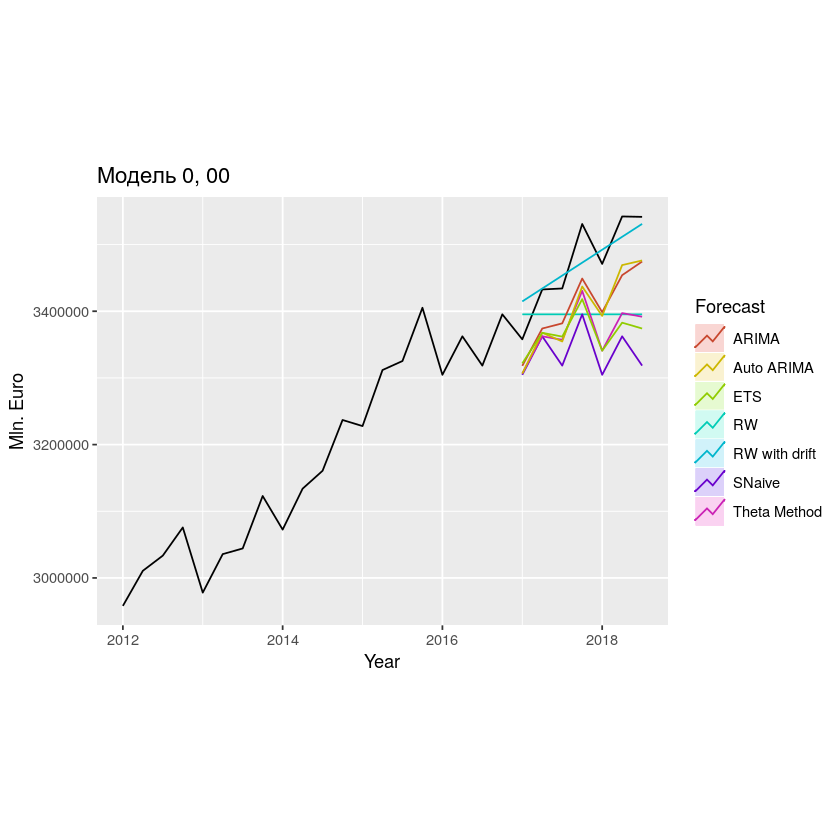

In [14]:
autoplot(window(gdp_agg, start=2012)) +
    autolayer(gdp_rwf, series="RW", PI=FALSE) +
    autolayer(gdp_rwfwd, series="RW with drift", PI=FALSE) +
    autolayer(gdp_snaive, series="SNaive", PI=FALSE) +
    autolayer(gdp_theta, series="Theta Method", PI=FALSE) +
    autolayer(gdp_arima, series="ARIMA", PI=FALSE) +
    autolayer(gdp_auto_arima, series="Auto ARIMA", PI=FALSE) +
    autolayer(gdp_ets, series="ETS", PI=FALSE) +
    xlab("Year") + ylab("Mln. Euro") +
    ggtitle("Модель 0, 00") +
    guides(colour=guide_legend(title="Forecast")) +
    theme(aspect.ratio = 0.75)

In [16]:
library(strucchange)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


In [20]:
breakpoints(gdp_agg)

ERROR: Error in UseMethod("breakpoints"): no applicable method for 'breakpoints' applied to an object of class "ts"


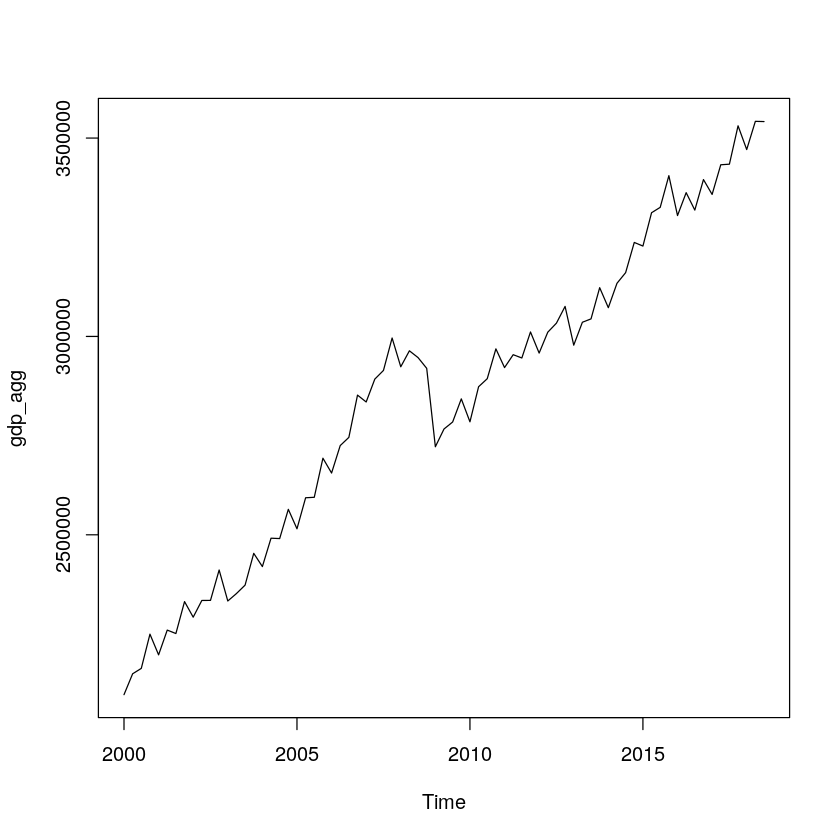

In [24]:
ts.plot(gdp_agg)


	 Optimal 2-segment partition: 

Call:
breakpoints.Fstats(obj = fs.gdp_agg)

Breakpoints at observation number:
27 

Corresponding to breakdates:
2006(3) 

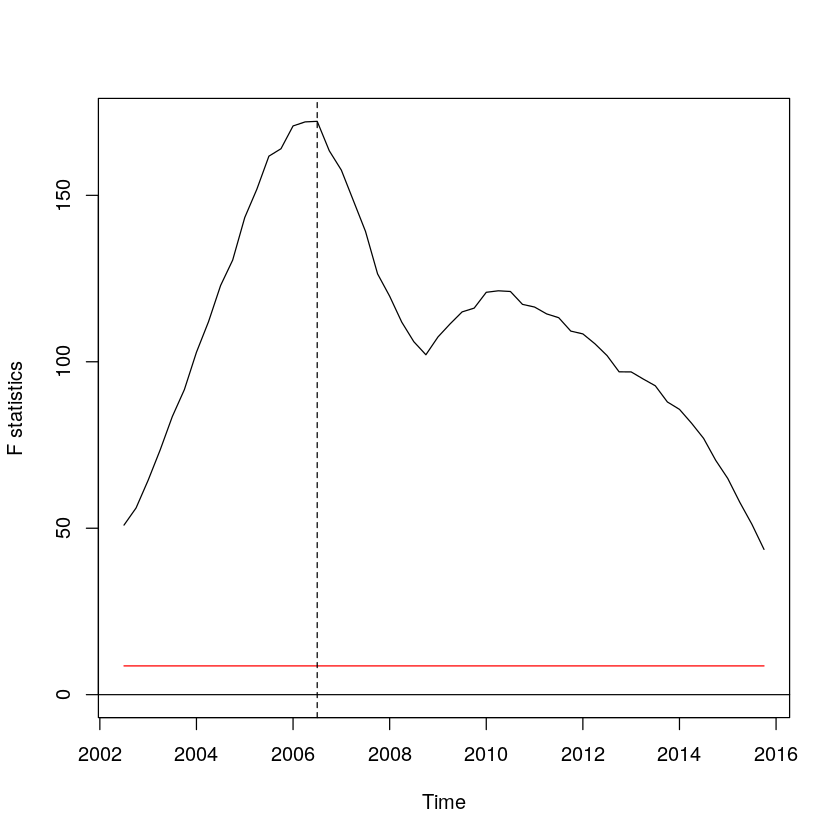

In [21]:
## F statistics indicate one breakpoint
fs.gdp_agg <- Fstats(gdp_agg ~ 1)
plot(fs.gdp_agg)
breakpoints(fs.gdp_agg)
lines(breakpoints(fs.gdp_agg))

In [25]:
## or
bp.gdp_agg <- breakpoints(gdp_agg ~ 1)
summary(bp.gdp_agg)


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = gdp_agg ~ 1)

Breakpoints at observation number:
                      
m = 1      27         
m = 2      23       58
m = 3   15 27       59
m = 4   15 26    47 59
m = 5   15 26 39 50 61

Corresponding to breakdates:
                                               
m = 1           2006(3)                        
m = 2           2005(3)                 2014(2)
m = 3   2003(3) 2006(3)                 2014(3)
m = 4   2003(3) 2006(2)         2011(3) 2014(3)
m = 5   2003(3) 2006(2) 2009(3) 2012(2) 2015(1)

Fit:
                                                               
m   0         1         2         3         4         5        
RSS 1.153e+13 3.431e+12 1.163e+12 7.593e+11 5.354e+11 5.226e+11
BIC 2.153e+03 2.071e+03 1.999e+03 1.975e+03 1.958e+03 1.964e+03


	 Optimal 5-segment partition: 

Call:
breakpoints.breakpointsfull(obj = bp.gdp_agg)

Breakpoints at observation number:
15 26 47 59 

Corresponding to breakdates:
2003(3) 2006(2) 2011(3) 2014(3) 

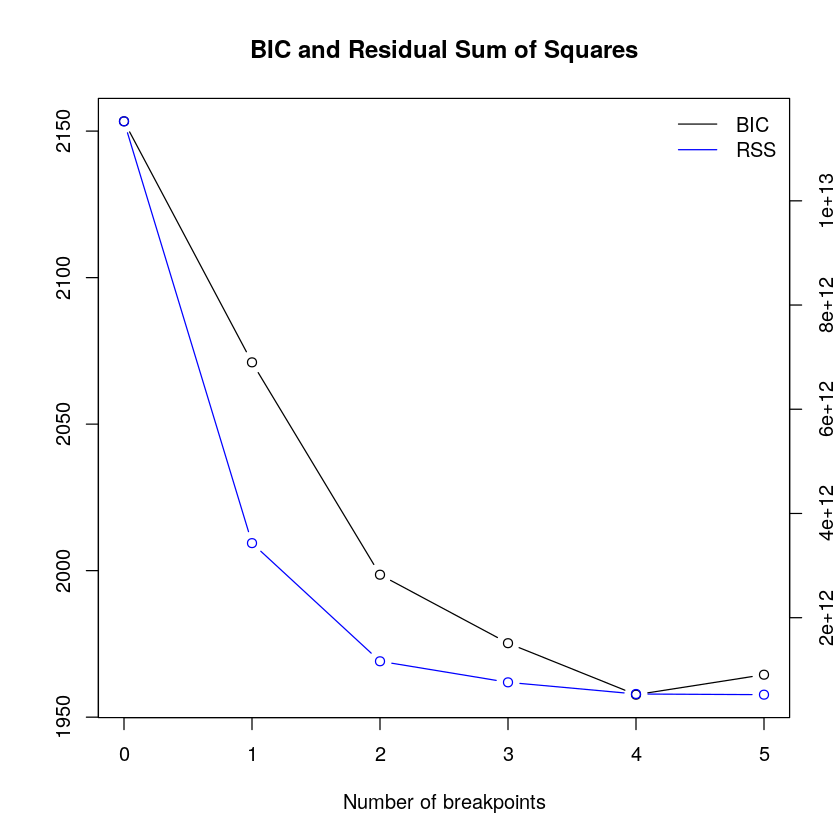

In [26]:
## the BIC also chooses one breakpoint
plot(bp.gdp_agg)
breakpoints(bp.gdp_agg)

In [ ]:
## fit null hypothesis model and model with 1 breakpoint
fm0 <- lm(gdp_agg ~ 1)
fm1 <- lm(gdp_agg ~ breakfactor(bp.gdp_agg, breaks = 1))

ERROR: Error in lines(bp.nile): object 'bp.nile' not found


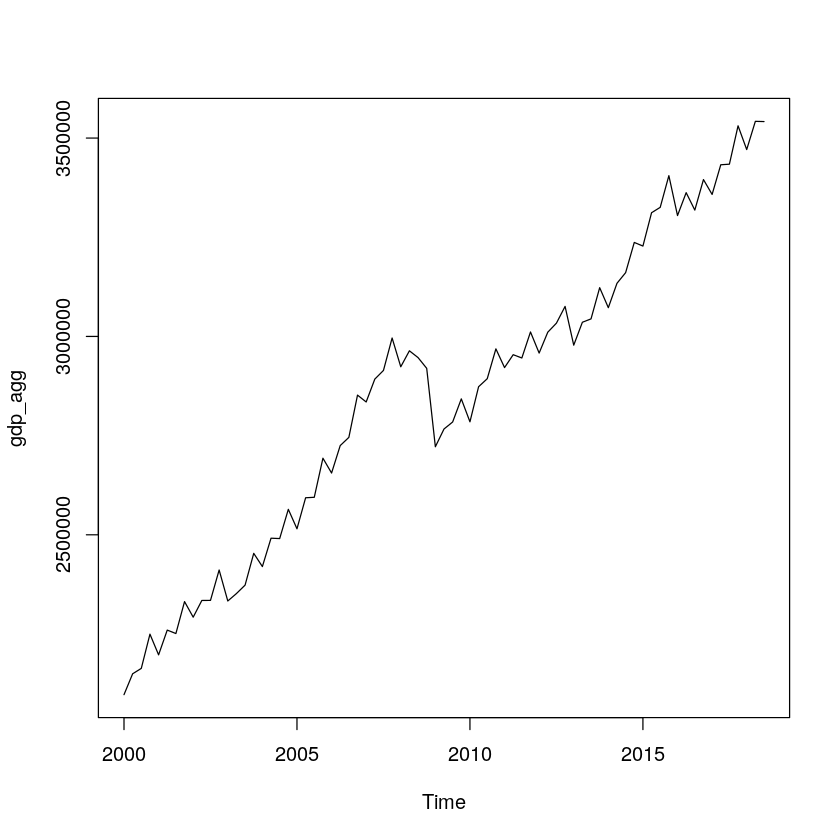

In [30]:
plot(gdp_agg)
lines(ts(fitted(fm0), start = 1871), col = 3)
lines(ts(fitted(fm1), start = 1871), col = 4)
lines(bp.nile)

In [31]:
## confidence interval
ci.gdp_agg <- confint(bp.gdp_agg)
ci.gdp_agg
lines(ci.gdp_agg)


	 Confidence intervals for breakpoints
	 of optimal 5-segment partition: 

Call:
confint.breakpointsfull(object = bp.gdp_agg)

Breakpoints at observation number:
  2.5 % breakpoints 97.5 %
1    13          15     17
2    25          26     28
3    45          47     50
4    58          59     60

Corresponding to breakdates:
  2.5 %   breakpoints 97.5 % 
1 2003(1) 2003(3)     2004(1)
2 2006(1) 2006(2)     2006(4)
3 2011(1) 2011(3)     2012(2)
4 2014(2) 2014(3)     2014(4)

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet
